In [ ]:
import sys
!{sys.executable} -m pip install openpyxl
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!{sys.executable} -m jupyter nbextension enable --py widgetsnbextension

In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from pandas_profiling import ProfileReport

%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [318]:
# Define all the csv input data files
people = pd.read_csv("PEOPLE.csv")
subj_pref = pd.read_csv("C_SUBJECT_PREF.csv")
region_pref = pd.read_csv("C_REGION_PREF.csv")
regions = pd.read_csv("REGIONS_DESC.csv")

In [319]:
# Merge all the data into 1 data frame (for easier operations)
all_data = pd.merge(people, subj_pref, how='outer', on="PERSONID")
region_data = pd.merge(region_pref, regions, how='outer', on="REGION_CODE")
all_data = pd.merge(all_data, region_data, how='outer', on="PERSONID")

In [320]:
len(all_data.PERSONID.unique())

9913

In [321]:
all_data.head(10)

,PERSONID,Applicant_Pool,UNIV_Selectivity,UNIV_Major,Candidate_Strength,Low_IncomeComm_Ex,Low_IncomeComm_Ex_L,Mission_KNWL_ALNMT,FastApp,ESSAY_Length,ESSAY_T1,ESSAY_T2,ESSAY_T3,ESSAY_T4,ESSAY_T5,ESSAY_T6,ESSAY_T7,ESSAY_T8,ESSAY_T9,ESSAY_T10,MATCH_REGION_CODE,MATCH_Subject,MATCH_is_home_region,MATCH_is_UNIV_Region,MATCH_is_Current_Region,MATCH_District,MATCH_School,MATCH_School_Type,MATCH_Grade_Level,MATCH_Y1_subject_group,OUTCOME_1_Confirmed,OUTCOME_2_StartTeaching,OUTCOME_3_Complet_Y1,OC_Satisfaction_Y1,OUTCOME_4_Complet_Y2,OC_Satisfaction_Y2,MATCH_Region_Pref_Level,MATCH_Region_Pref_Rank,MATCH_Subject_Prefer,SUBJECT_Pref,SUBJECT_Pref_Level,SUBJECT_Teach_Mapping,REGION_CODE,REGION_Pref_Level,REGION_Pref_Rank,CERT_COST,RENT_2_shared,RENT_1_single,Y1_MIN_SAL,Y1_MAX_SAL,Y2_MIN_SAL,Y2_MAX_SAL,SEX_RATIO_ M,AGE_20_24,AGE_25_29,AGE_30_34,AGE_35_39,AGE_40_44,AGE_45_49,RACE_NON_WHITE,RACE_Two_or_more,Population_size,ED_ATN_Less_9G,ED_ATN_HS_p,ED_ATN_Bachelor_p,TEMP_MAX_JAN,TEMP_MAX_FEB,TEMP_MAX_MAR,TEMP_MAX_APR,TEMP_MAX_MAY,TEMP_MAX_JUN,TEMP_MAX_JUL,TEMP_MAX_AUG,TEMP_MAX_SEP,TEMP_MAX_OCT,TEMP_MAX_NOV,TEMP_MAX_DEC,TEMP_MAX_ANN,TEMP_MIN_JAN,TEMP_MIN_FEB,TEMP_MIN_MAR,TEMP_MIN_APR,TEMP_MIN_MAY,TEMP_MIN_JUN,TEMP_MIN_JUL,TEMP_MIN_AUG,TEMP_MIN_SEP,TEMP_MIN_OCT,TEMP_MIN_NOV,TEMP_MIN_DEC,TEMP_MIN_ANN,SUN_PERCT_JAN,SUN_PERCT_FEB,SUN_PERCT_MAR,SUN_PERCT_APR,SUN_PERCT_MAY,SUN_PERCT_JUN,SUN_PERCT_JUL,SUN_PERCT_AUG,SUN_PERCT_SEP,SUN_PERCT_OCT,SUN_PERCT_NOV,SUN_PERCT_DEC,SUN_PERCT_ANN,DEM_perc_16,DEM_perc_20,GOP_perc_16,GOP_perc_20,delta_turnout,ECON_GINI,TOURISTS,WALKSCORE,BIKESCORE,TRANISTCORE
0,100064,A,More Selective,Art,0.755037,Y,LEVEL3,4.0,0,1697,0.002566,0.002565,0.487455,0.002565,0.073422,0.002567,0.002566,0.002565,0.421163,0.002565,401,HSGENSCIENCE,True,True,True,Partner 379,School 2398,Traditional Public School,HIGH,Science,1,1,1,7.0,1,6.75,1.0,1.0,2,NaN,NaN,NaN,411.0,2.0,1.0,0.0,700.0,1150.0,36000.0,48000.0,36000.0,48000.0,92.7,5.7,6.9,7.3,7.1,6.4,5.9,0.4265,0.0195,small,3.6,91.2,38.2,62.1,65.4,71.8,78.2,85.2,89.5,91.2,91.2,87.5,80.0,71.8,64.4,78.2,44.7,48.0,53.5,60.0,68.1,73.5,75.3,75.3,72.0,62.6,53.5,46.9,61.2,48.0,52.0,56.0,62.0,59.0,67.0,61.0,59.0,61.0,70.0,57.0,54.0,58.0,0.509,0.539,0.449,0.443,1.101,0.4942,0.007167,59.000000,66.000000,44.0
1,100064,A,More Selective,Art,0.755037,Y,LEVEL3,4.0,0,1697,0.002566,0.002565,0.487455,0.002565,0.073422,0.002567,0.002566,0.002565,0.421163,0.002565,401,HSGENSCIENCE,True,True,True,Partner 379,School 2398,Traditional Public School,HIGH,Science,1,1,1,7.0,1,6.75,1.0,1.0,2,NaN,NaN,NaN,419.0,3.0,5.0,0.0,100.0,1600.0,47500.0,52500.0,47500.0,52500.0,94.5,5.7,6.6,6.7,6.3,6.7,6.9,0.2999,0.0263,big city,7.1,90.8,34.4,76.4,78.1,80.3,83.2,87.0,89.5,90.9,91.0,89.3,86.2,81.7,77.9,84.3,59.9,62.3,64.9,68.3,72.9,76.0,77.3,77.4,76.5,73.5,68.1,63.0,70.1,68.0,68.0,74.0,79.0,73.0,70.0,77.0,72.0,69.0,72.0,63.0,66.0,70.0,0.637,0.534,0.341,0.461,1.203,0.5076,0.004167,78.000000,65.000000,57.0
2,100064,A,More Selective,Art,0.755037,Y,LEVEL3,4.0,0,1697,0.002566,0.002565,0.487455,0.002565,0.073422,0.002567,0.002566,0.002565,0.421163,0.002565,401,HSGENSCIENCE,True,True,True,Partner 379,School 2398,Traditional Public School,HIGH,Science,1,1,1,7.0,1,6.75,1.0,1.0,2,NaN,NaN,NaN,432.0,3.0,3.0,2608.0,900.0,1725.0,37218.0,49100.0,37218.0,49100.0,97.7,4.5,5.8,6.3,7.9,6.3,6.2,0.6638,0.2113,very small,4.7,95.2,24.2,80.1,80.2,81.2,82.7,84.6,87.0,87.9,88.7,88.6,86.7,83.9,81.2,84.4,66.3,66.1,67.7,69.4,70.9,73.4,74.5,75.1,74.4,73.4,71.4,68.3,70.9,59.0,62.0,68.0,63.0,66.0,67.0,71.0,73.0,75.0,67.0,60.0,56.0,65.0,0.615,0.625,0.316,0.357,1.411,0.4333,0.000300,23.000000,23.000000,36.0
3,100064,A,More Selective,Art,0.755037,Y,LEVEL3,4.0,0,1697,0.002566,0.002565,0.487455,0.002565,0.073422,0.002567,0.002566,0.002565,0.421163,0.002565,401,HSGENSCIENCE,True,True,True,Partner 379,School 2398,Traditional Public School,HIGH,Science,1,1,1,7.0,1,6.75,1.0,1.0,2,NaN,NaN,NaN,400.0,1.0,2.0,2300.0,720.0,1200.0,44000.0,47000.0,44000.0,47000.0,93.5,6.4,7.3,7.

In [322]:
all_data.isna().sum()

PERSONID                        0
Applicant_Pool                  0
UNIV_Selectivity                0
UNIV_Major                      0
Candidate_Strength            217
Low_IncomeComm_Ex              11
Low_IncomeComm_Ex_L           217
Mission_KNWL_ALNMT            257
FastApp                         0
ESSAY_Length                    0
ESSAY_T1                        0
ESSAY_T2                        0
ESSAY_T3                        0
ESSAY_T4                        0
ESSAY_T5                        0
ESSAY_T6                        0
ESSAY_T7                        0
ESSAY_T8                        0
ESSAY_T9                        0
ESSAY_T10                       0
MATCH_REGION_CODE               0
MATCH_Subject                   0
MATCH_is_home_region            0
MATCH_is_UNIV_Region            0
MATCH_is_Current_Region         0
MATCH_District              77418
MATCH_School                77418
MATCH_School_Type           77418
MATCH_Grade_Level           77418
MATCH_Y1_subje

In [323]:
# Data cleaning
all_data.UNIV_Selectivity = np.where(all_data.UNIV_Selectivity == 'More selective', 'More Selective',  all_data.UNIV_Selectivity)
all_data.UNIV_Selectivity = np.where(all_data.UNIV_Selectivity == 'Least Selective', 1, all_data.UNIV_Selectivity)
all_data.UNIV_Selectivity = np.where(all_data.UNIV_Selectivity == 'Less Selective', 2, all_data.UNIV_Selectivity)
all_data.UNIV_Selectivity = np.where(all_data.UNIV_Selectivity == 'Selective', 3, all_data.UNIV_Selectivity)
all_data.UNIV_Selectivity = np.where(all_data.UNIV_Selectivity == 'More Selective', 4, all_data.UNIV_Selectivity)
all_data.UNIV_Selectivity = np.where(all_data.UNIV_Selectivity == 'Most Selective', 5, all_data.UNIV_Selectivity)

all_data.UNIV_Selectivity = all_data.UNIV_Selectivity.astype(int)
all_data.MATCH_is_home_region = all_data.MATCH_is_home_region.astype(int)
all_data.MATCH_is_UNIV_Region = all_data.MATCH_is_UNIV_Region.astype(int)
all_data.MATCH_is_Current_Region = all_data.MATCH_is_Current_Region.astype(int)

all_data.Low_IncomeComm_Ex = np.where(all_data.Low_IncomeComm_Ex == 'Y', 1,  all_data.Low_IncomeComm_Ex)
all_data.Low_IncomeComm_Ex = np.where(all_data.Low_IncomeComm_Ex == 'N', 0,  all_data.Low_IncomeComm_Ex)
all_data.Low_IncomeComm_Ex.fillna(all_data.Low_IncomeComm_Ex.mean(), inplace=True)

all_data.Low_IncomeComm_Ex_L = np.where(all_data.Low_IncomeComm_Ex_L == 'LEVEL1', 1,  all_data.Low_IncomeComm_Ex_L)
all_data.Low_IncomeComm_Ex_L = np.where(all_data.Low_IncomeComm_Ex_L == 'LEVEL2', 2,  all_data.Low_IncomeComm_Ex_L)
all_data.Low_IncomeComm_Ex_L = np.where(all_data.Low_IncomeComm_Ex_L == 'LEVEL3', 3,  all_data.Low_IncomeComm_Ex_L)
all_data.Low_IncomeComm_Ex_L.fillna(all_data.Low_IncomeComm_Ex_L.mean(), inplace=True)

all_data.Candidate_Strength.fillna(all_data.Candidate_Strength.mean(), inplace=True)
all_data.Mission_KNWL_ALNMT.fillna(all_data.Mission_KNWL_ALNMT.mean(), inplace=True)

all_data.MATCH_Region_Pref_Level.fillna(all_data.MATCH_Region_Pref_Level.mean(), inplace=True)
all_data.MATCH_Region_Pref_Rank.fillna(all_data.MATCH_Region_Pref_Rank.mean(), inplace=True)

all_data.REGION_Pref_Level.fillna(all_data.REGION_Pref_Level.mean(), inplace=True)
all_data.REGION_Pref_Rank.fillna(all_data.REGION_Pref_Rank.mean(), inplace=True)

In [324]:
# all_data.groupby('UNIV_Major').size().sort_values(ascending=False)
# Split by A/B pool

In [325]:
# Tmp Playground ---- ignore -----
all_data.UNIV_Selectivity.unique() 

array([4, 1, 5, 3, 2])

In [326]:
# Data sampling
# def split_data_by_major(df):
#     res = {}
#     for x in all_data.UNIV_Major.unique():
#         res[x] = df.loc[df.UNIV_Major == x]
#     return res

In [327]:
# Reset all
# all_data = all_data_bk
# all_data.describe()

In [328]:
# Assign sample over here ! ===========================
# all_data_bk = all_data

# all_data = all_data.loc[all_data.Applicant_Pool == 'A']
# all_data = all_data.loc[all_data.is_home_univ_curr_region_matched == 1]
# all_data = split_data_by_major(all_data)['Art']
# all_data.head(100)

# len(all_data)

In [329]:
print ("Total unique candidates:", len(all_data.PERSONID.unique()))
print ("People who accepted the offer:", len(all_data.loc[all_data.OUTCOME_1_Confirmed == 1].PERSONID.unique()))
print ("People who started teaching their first day:", len(all_data.loc[all_data.OUTCOME_2_StartTeaching == 1].PERSONID.unique()))
print ("People who finished year (One):", len(all_data.loc[all_data.OUTCOME_3_Complet_Y1 == 1].PERSONID.unique()))
print ("People who filled survey year (One):", len(all_data.loc[~all_data.OC_Satisfaction_Y1.isna()].PERSONID.unique()))
print ("People who finished year (Two):", len(all_data.loc[all_data.OUTCOME_4_Complet_Y2 == 1].PERSONID.unique()))
print ("People who filled survey year (Two):", len(all_data.loc[~all_data.OC_Satisfaction_Y2.isna()].PERSONID.unique()))

Total unique candidates: 9913
People who accepted the offer: 7845
People who started teaching their first day: 6694
People who finished year (One): 5744
People who filled survey year (One): 5415
People who finished year (Two): 5234
People who filled survey year (Two): 4060


In [330]:
# All Label encoding -------------------------------- (appended with suffix _encoded)
le = preprocessing.LabelEncoder()


In [331]:
# All One hot encoding -------------------------------- (appended)
# one_hot_cols = pd.get_dummies(all_data.UNIV_Selectivity, prefix="encoded")
# all_data = pd.concat([all_data, one_hot_cols], axis=1)

# one_hot_cols = pd.get_dummies(all_data.Population_size, prefix="encoded")
# all_data = pd.concat([all_data, one_hot_cols], axis=1)

In [332]:
# Adding my own columns (also appended) ( or all 3)
all_data['is_region_matched'] = np.where(all_data.MATCH_REGION_CODE == all_data.REGION_CODE, 1 , 0)
all_data['is_subject_matched'] = np.where(all_data.SUBJECT_Pref == all_data.MATCH_Subject, 1 ,0)
all_data['is_home_univ_curr_region_matched'] = np.where((all_data.MATCH_is_home_region == 1) & (all_data.MATCH_is_UNIV_Region == 1), 1, 0)

all_data['is_positive_exp'] = np.where((all_data.OC_Satisfaction_Y2 >= 4.5) & (all_data.Candidate_Strength >= 0.70) & (all_data.is_home_univ_curr_region_matched == 1), 1 ,0)
all_data['is_negative_exp'] = np.where((all_data.OC_Satisfaction_Y2 < 4.5) & (all_data.Candidate_Strength < 0.70) & (all_data.is_home_univ_curr_region_matched == 1), 1 ,0)

## This is important ... so try to figure out new variables that we can combine .. and then use those in the correlation graph ...
# That's probably the best bet ... so determine like 2 or 3 custom variables to use in the model!
# - 1 var coule be a total of all of the person's home town state ( high walk score + byke score ... etc ? )
# - 2 was everything matched ? or the degree to which his shit was actually maatched ... not a 1 / 0 value ... 
# - 3 mission knowledge / previous comm exp .... maybe a combination of those 2 ?  nah we can also keep em as seperate 
# we would have a total of 4 ... maybe candidate strength can be used as well.. so 5 .. something like that let's try with that and see

<AxesSubplot:>

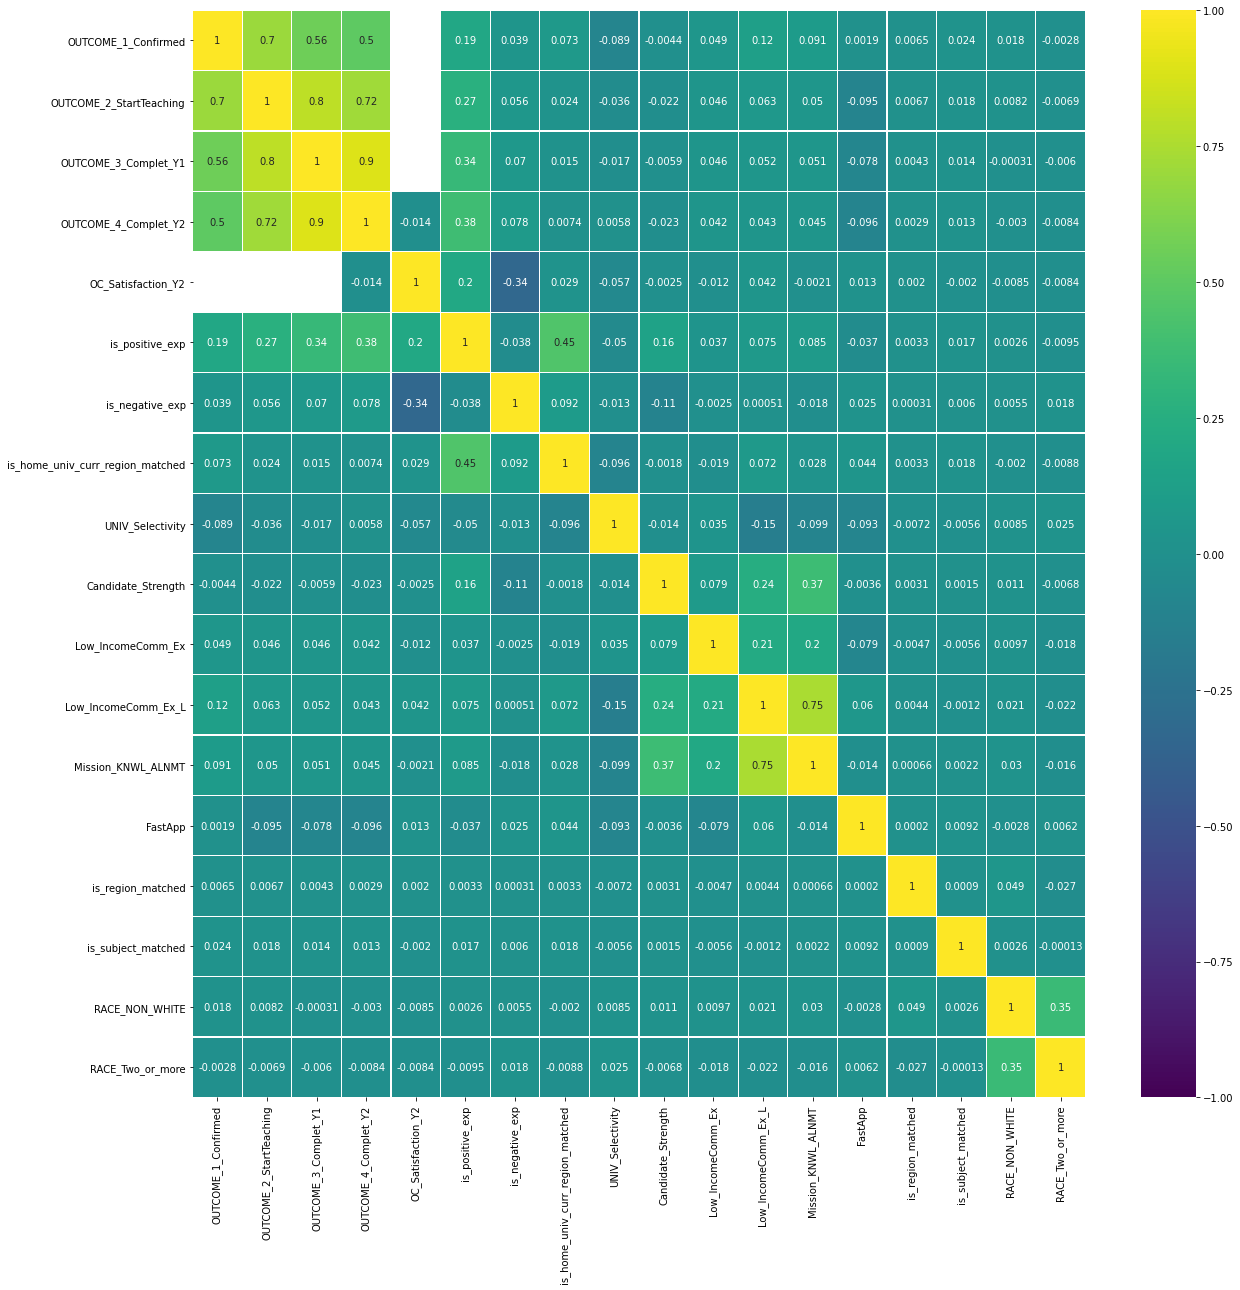

In [333]:
# Print correlation table
plt.figure(figsize=(20,20))
cols = [
#     'PERSONID',
    'OUTCOME_1_Confirmed',
    'OUTCOME_2_StartTeaching',
    'OUTCOME_3_Complet_Y1',
    'OUTCOME_4_Complet_Y2',
    'OC_Satisfaction_Y2',
    'is_positive_exp',
    'is_negative_exp',
    'is_home_univ_curr_region_matched',
    'UNIV_Selectivity',
    'Candidate_Strength',
#     'Low_IncomeComm_Ex',
    'Low_IncomeComm_Ex_L',
    'Mission_KNWL_ALNMT',
    'FastApp',
    'is_region_matched',
    'is_subject_matched',
#     'is_major_matched',
    'RACE_NON_WHITE',
    'RACE_Two_or_more',
#     'SEX_RATIO_ M',
#     'AGE_45_49',
#     'AGE_40_44',
#     'AGE_35_39',
#     'AGE_30_34',
#     'AGE_25_29',
#     'AGE_20_24',
#     'ECON_GINI',
#     'TOURISTS',
#     'WALKSCORE',
#     'BIKESCORE',
#     'TRANISTCORE',
#     'encoded_big city',
#     'encoded_city',
#     'encoded_small',
#     'encoded_very small',
]

correlation = all_data[cols].corr()
sns.heatmap(correlation, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

In [76]:
# prof = ProfileReport(all_data)
# prof.to_file(output_file='report.html')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


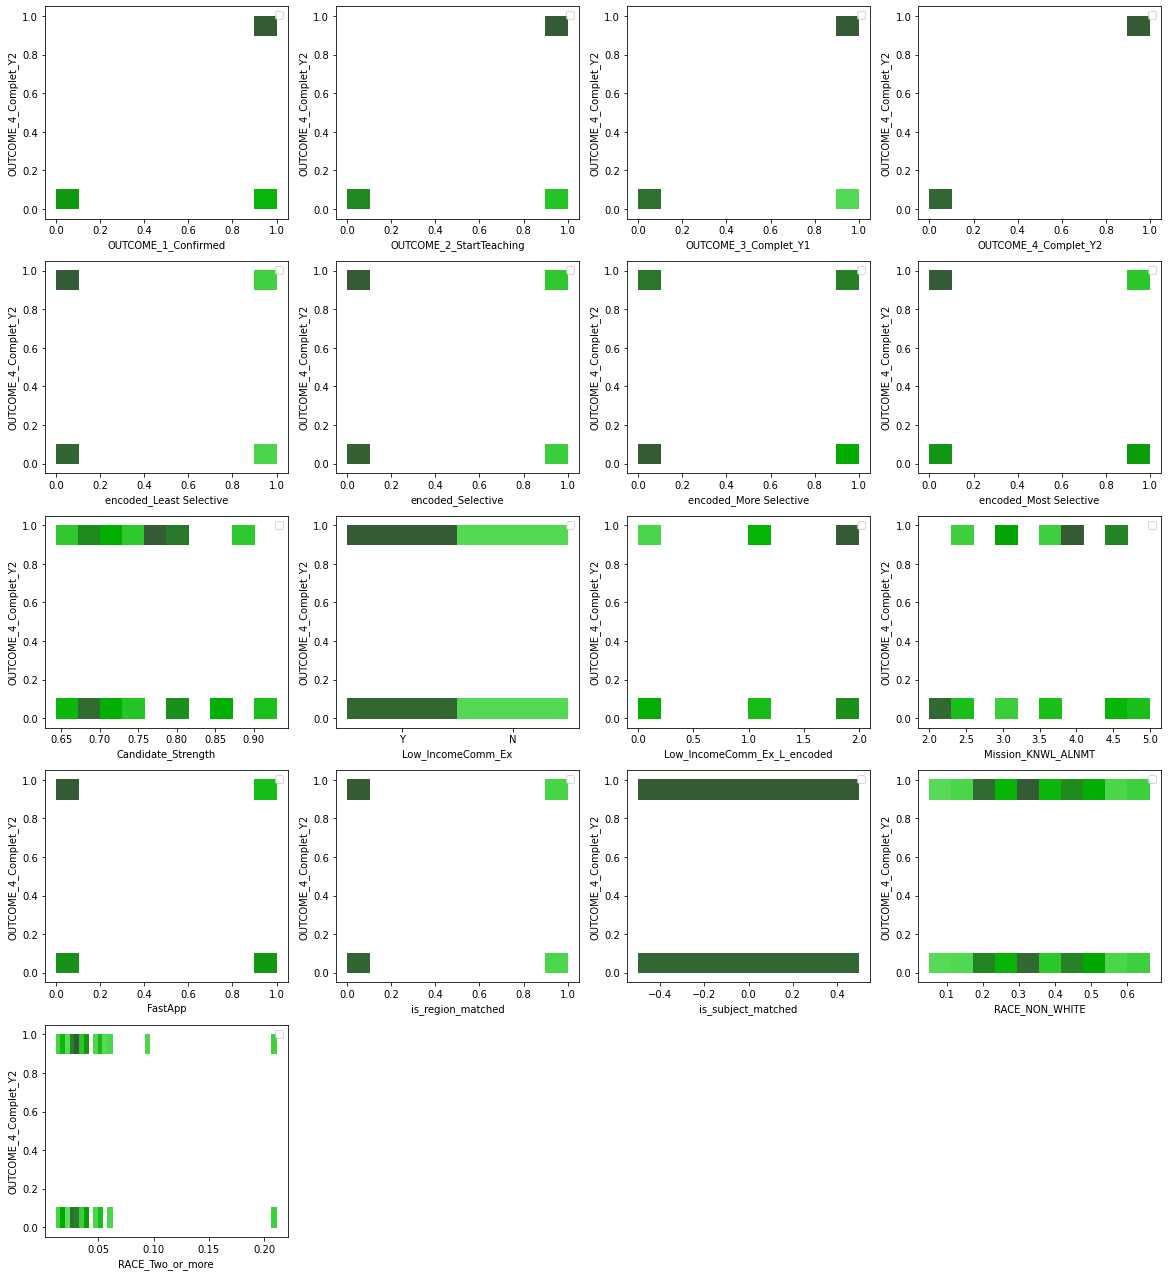

In [473]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in cols:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.histplot(all_data[i], y=all_data['OUTCOME_4_Complet_Y2'], x=all_data[i], color='g', label = 'green')
#     sns.histplot(all_data[i][all_data['OUTCOME_4_Complet_Y2']==0], y=all_data['OUTCOME_4_Complet_Y2'], x=all_data[i], color='r', label = 'red')
    plt.legend(loc='best')
fig.subplots_adjust(top=0.95)
plt.show()